In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_classification, make_gaussian_quantiles
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [19]:
moon = make_classification(n_samples=200,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1)
features,labels = moon
print(features,labels)

[[-7.44830887e-01 -9.32088487e-01]
 [-1.59066088e+00  1.39278520e+00]
 [-2.51652017e+00  2.02112127e+00]
 [ 2.47656024e-01 -2.12522321e+00]
 [-2.12011479e+00 -1.32482859e-01]
 [-1.24262555e+00 -8.10089322e-01]
 [-4.94215043e-01  6.68813747e-01]
 [-6.88680580e-01 -7.47897354e-01]
 [-2.42228287e+00  1.89132302e+00]
 [-2.40751120e-03  4.18673168e-01]
 [-2.22699940e+00  1.84798662e+00]
 [-6.85893862e-01  8.18649650e-01]
 [-1.47309130e+00  1.25164455e+00]
 [-1.54957956e+00  1.37273554e+00]
 [ 6.32978860e-01 -1.61009262e+00]
 [-1.34495774e+00 -5.66919808e-01]
 [-1.14309692e+00  1.11591988e+00]
 [-1.80399865e+00  1.55897637e+00]
 [-6.08381994e-01 -1.45552185e+00]
 [-1.25513746e+00 -1.28763406e+00]
 [ 5.71958074e-02  3.98594208e-01]
 [-4.98976350e-01  7.94776088e-01]
 [-1.03058555e+00  1.04760683e+00]
 [-2.15704766e+00 -1.13734373e-01]
 [-1.50794804e+00 -5.99784756e-01]
 [-1.70223910e-01  4.42036954e-01]
 [-2.22364166e+00  1.83890617e+00]
 [-6.52785001e-01 -1.25229735e+00]
 [-7.94646980e-01 -1

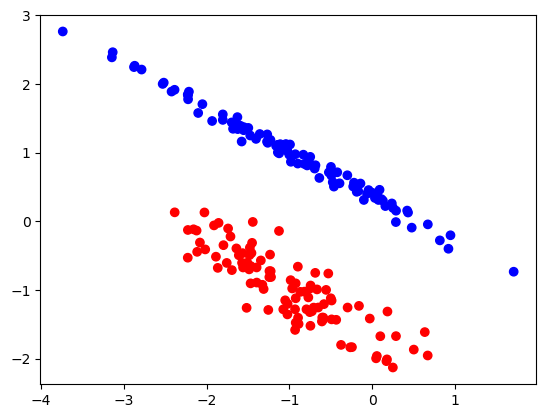

In [20]:
pos_label = 1
neg_label = 0
T = (pos_label+neg_label) / 2
colors = ['red', 'blue']
plt.scatter(features[:,0], features[:,1], color=[colors[idx] for idx in labels])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=4,random_state=42)
X_train_m = np.asmatrix(X_train, dtype='float64')
X_test_m = np.asmatrix(X_test, dtype='float64')
y_train_m = np.asmatrix(y_train, dtype='float64')
y_train_m = np.transpose(y_train_m)
y_test_m = np.asmatrix(y_test, dtype='float64')
y_test_m = np.transpose(y_test_m)

In [22]:
def GradientDescentLearning(features, labels, max_iter, learning_rate, err_threshold, test_features, test_labels):
    
    # random initialize weight values between rage: [-0.5,0.5]
    w = np.random.rand(features.shape[1]+1)-0.5
    
    totalSquaredErr_ = []
    totalSquaredErrTest_ = []
    accuracy_= []
    epoch=0
    err=9999.0
    while (epoch<max_iter) and (err>err_threshold):
        misclassified = 0
        deltaw=[0]*(features.shape[1]+1)
        for i, x in enumerate(features):
            x = np.insert(x,0,1)

            v = np.dot(w, x.transpose())
            
            diff = learning_rate*(labels[i] - v)
            deltaw=deltaw+diff*x
        
        #update weights
        #print(deltaw)
        w=w+deltaw
        
        # now calculate training error using new weights
        this_err=0
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            this_err=this_err+(labels[i] - v)*(labels[i] - v)
        this_err=np.ndarray.item(this_err) 
        this_err=this_err/2.0
        #mean squared error
        err=this_err/features.shape[0]        
        totalSquaredErr_.append(err)
        
        # now calculate test error using new weights
        this_err=0
        for i, x in enumerate(test_features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            this_err=this_err+(test_labels[i] - v)*(test_labels[i] - v)
        this_err=np.ndarray.item(this_err) 
        this_err=this_err/2.0
        totalSquaredErrTest_.append(this_err/test_features.shape[0])
        # now calculate test classification accuracy
        this_err=0
        for i, x in enumerate(test_features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            if(((v-T)>=0 and test_labels[i]==neg_label) or ((v-T)<0 and test_labels[i]==pos_label)):
                this_err=this_err+1
        this_err=float(this_err) 
        this_err=this_err/test_features.shape[0]
        accuracy_.append(1-this_err)        
        #next epoch
        epoch=epoch+1
    return (w, totalSquaredErr_, totalSquaredErrTest_, accuracy_)


In [23]:
max_iter = 500
eta = 0.001
print("Learning rate is: %.5f" % eta)
err_threshold = 0.002
w, misclassified, testError, accuracy = GradientDescentLearning(X_train_m,y_train_m,max_iter, eta, err_threshold, X_test_m, y_test_m)
print(misclassified[0:10])
print(testError[0:10])
print(accuracy[0:10])

Learning rate is: 0.00100
[0.2199557923842318, 0.17001138282931286, 0.14702920325154994, 0.13207627633814237, 0.12008372731357723, 0.10962333707722847, 0.1002372208261381, 0.09173560759598971, 0.0840093779423306, 0.07697833797501409]
[0.3698625602807905, 0.3780560230146943, 0.37791029276222504, 0.3651754766281628, 0.34493940554919633, 0.3215256894151956, 0.29748266766365006, 0.2741195463681516, 0.25204106557985545, 0.23148221220681103]
[0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]


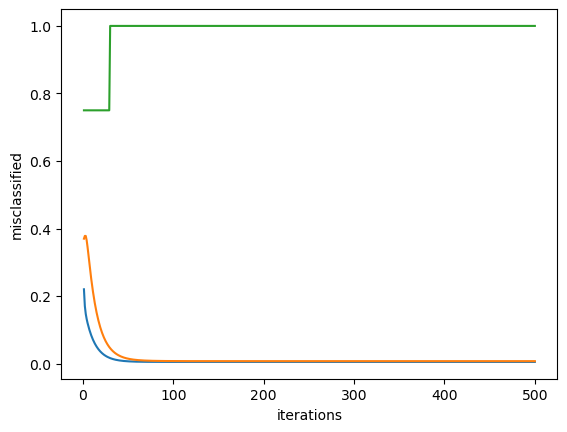

In [24]:
epochs = np.arange(1, max_iter+1)
plt.plot(epochs, misclassified)
plt.plot(epochs, testError)
plt.plot(epochs, accuracy)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

In [25]:
print(w)
slope= w[0,1]/w[0,2]*(-1)
intercept = (T-w[0,0]/w[0,2])
print(slope,intercept)

[[0.81488737 0.31967696 0.4835803 ]]
-0.661062831511389 -1.1851128515930178


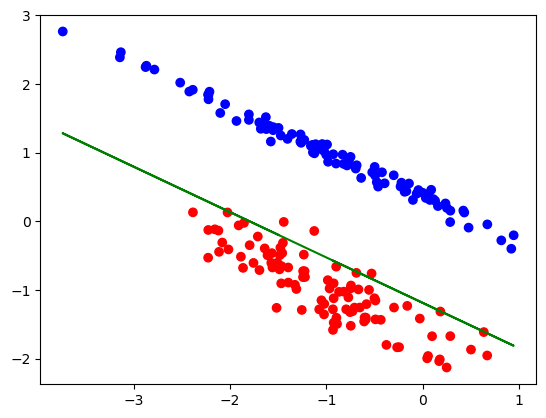

In [26]:
xvalues = X_train[:,0]
yvalues = xvalues * slope + intercept
plt.scatter(X_train[:,0],X_train[:,1], color = [colors[idx] for idx in y_train])
plt.plot(xvalues,yvalues,'g-')